# Cycling data from Auckland New Zeeland


You receive hourly data from the city of Auckland. They wanted to promote cycling in the city and decided to monitor cyclists to see how many cyclists travel through the city.

Your assignment is to make a forecasting model for the year 2018 (daily counts). Quantify the performance and see if you can improve your model by adding holidays and or weather.

I have aggregated the data for you in nice files so that you do not have to to the messy work.


daily counts: cycling_counts_by_day.csv
hourly counts: cycling_counts_combined_2014_2018.csv
auckland weather: Auckland_weather_combined.csv

for holidays you can use the holidays python package

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet
import holidays

import matplotlib.pyplot as plt

/home/xander/Documents/projects/MachineLearing-Forcasting/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### Read data

In [2]:
cycle_data = pd.read_csv("cycling_counts_by_day.csv",)
cycle_data.rename(columns={'Tamaki Drive EB':"amount"},inplace = True)
cycle_data['datetime']= pd.to_datetime(cycle_data['datetime'])
cycle_data.head()


,datetime,amount
0,2010-07-01,570.0
1,2010-07-02,473.0
2,2010-07-03,766.0
3,2010-07-04,240.0
4,2010-07-05,172.0


In [ ]:
cycle_data.info()

In [ ]:
cycle_data.describe()

<Axes: xlabel='datetime', ylabel='amount'>

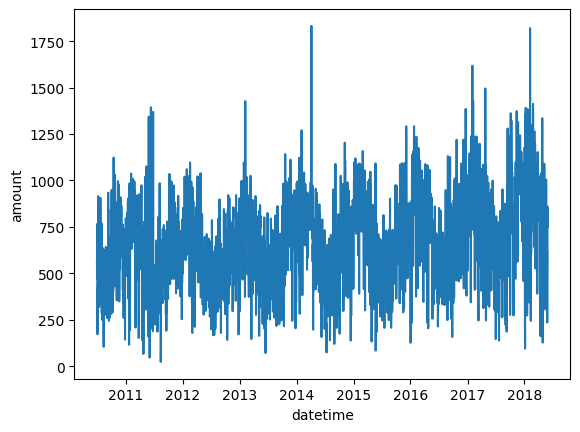

In [3]:
sns.lineplot(cycle_data, x = 'datetime', y = 'amount', legend = False)


In [4]:

train_cycle = cycle_data[cycle_data['datetime']<'2018']
test_cycle = cycle_data[cycle_data['datetime']>='2018']

train_cycle.tail()


,datetime,amount
2736,2017-12-27,838.0
2737,2017-12-28,940.0
2738,2017-12-29,811.0
2739,2017-12-30,960.0
2740,2017-12-31,914.0


In [ ]:
test_cycle.head()

In [5]:
train_cycle.rename(columns={'datetime':"ds"},inplace = True)
train_cycle.rename(columns={'amount':"y"},inplace = True)
test_cycle.rename(columns={'datetime':"ds"},inplace = True)
test_cycle.rename(columns={'amount':"y"},inplace = True)

train_cycle

/tmp/ipykernel_7029/2789968491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cycle.rename(columns={'datetime':"ds"},inplace = True)
/tmp/ipykernel_7029/2789968491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cycle.rename(columns={'amount':"y"},inplace = True)
/tmp/ipykernel_7029/2789968491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cycle.rename(columns={'datetime':"ds"},inplace = True)
/tmp/ipyker

,ds,y
0,2010-07-01,570.0
1,2010-07-02,473.0
2,2010-07-03,766.0
3,2010-07-04,240.0
4,2010-07-05,172.0
...,...,...
2736,2017-12-27,838.0
2737,2017-12-28,940.0
2738,2017-12-29,811.0
2739,2017-12-30,960.0


In [6]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(train_cycle)

10:43:07 - cmdstanpy - INFO - Chain [1] start processing
10:43:07 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future_days = len(test_cycle)
future_days

151

In [8]:
forecast_days = future_days # length of test set
future = m.make_future_dataframe(periods=forecast_days )
future

,ds
0,2010-07-01
1,2010-07-02
2,2010-07-03
3,2010-07-04
4,2010-07-05
...,...
2887,2018-05-27
2888,2018-05-28
2889,2018-05-29
2890,2018-05-30


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2887,2018-05-27,767.235731,512.608659,998.405981
2888,2018-05-28,708.584417,463.333210,939.813393
2889,2018-05-29,812.270504,571.991483,1034.262593
2890,2018-05-30,735.948632,509.635744,967.474907
2891,2018-05-31,722.368374,477.513481,939.110043


In [11]:
test_cycle

,ds,y
2741,2018-01-01,522.0
2742,2018-01-02,1179.0
2743,2018-01-03,1000.0
2744,2018-01-04,231.0
2745,2018-01-05,95.0
...,...,...
2887,2018-05-27,235.0
2888,2018-05-28,709.0
2889,2018-05-29,859.0
2890,2018-05-30,787.0


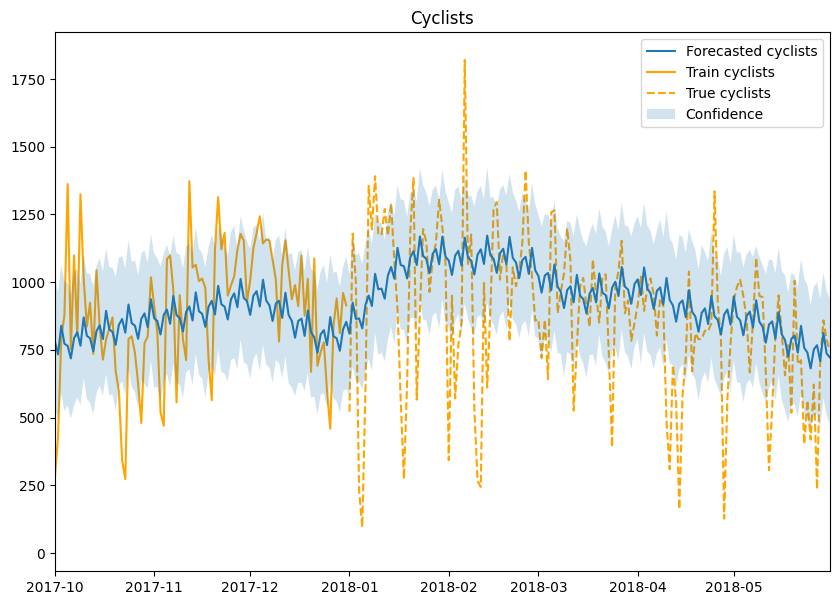

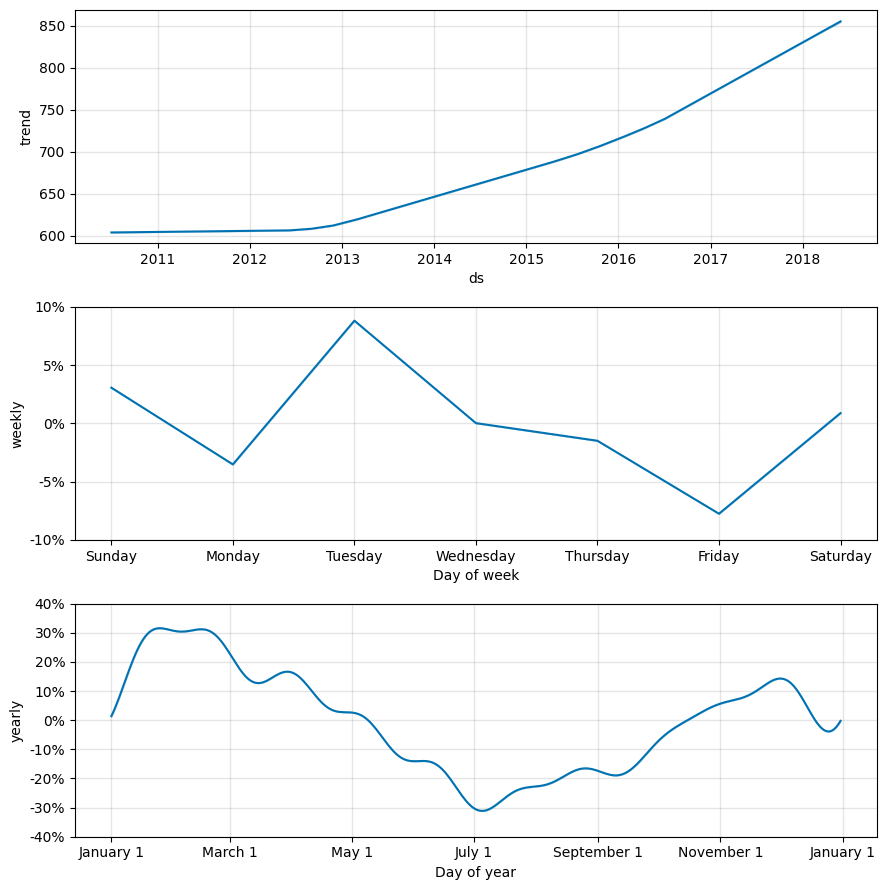

In [12]:
train_data_plot = train_cycle
test_data_plot = test_cycle

plt.figure(figsize = (10,7))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted cyclists', zorder = 1)
plt.plot(train_data_plot['ds'], train_data_plot['y'], label='Train cyclists', zorder = 0, color = 'orange')                                                                                       
plt.plot(test_data_plot['ds'], test_data_plot['y'], label='True cyclists', zorder = 0, color = 'orange', linestyle='dashed')
plt.fill_between(forecast['ds'], forecast['yhat_upper'], forecast['yhat_lower'],
                 alpha=.2, label='Confidence')
plt.title('Cyclists')
plt.legend()
plt.xlim(pd.to_datetime(['2017-10-01','2018-05-31']))
#plt.savefig('prophet_forecast.png')
plt.show()
fig2 = m.plot_components(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
! pip install holidays

In [13]:

nz_holidays = holidays.NewZealand(years=range(2010,2018),subdiv='Auckland')  
all_holidays = pd.DataFrame(
    [{"ds": date, "holiday": name} for date, name in nz_holidays.items()])
all_holidays

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-01-02,Day after New Year's Day
2,2016-01-04,Day after New Year's Day (observed)
3,2016-02-06,Waitangi Day
4,2016-02-08,Waitangi Day (observed)
...,...,...
95,2015-10-26,Labour Day
96,2015-12-25,Christmas Day
97,2015-12-26,Boxing Day
98,2015-12-28,Boxing Day (observed)


In [ ]:
m = Prophet(holidays=all_holidays,
            seasonality_mode='multiplicative')
m.fit(train_cycle)


forecast_days = future_days
future = m.make_future_dataframe(periods=forecast_days )


forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.loc[forecast['yhat'] <0, 'yhat'] = 0

10:48:56 - cmdstanpy - INFO - Chain [1] start processing
10:48:57 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2012-01-01
1    2012-01-02
2    2012-01-03
3    2012-01-04
4    2012-01-05
...         ...
2338 2018-05-27
2339 2018-05-28
2340 2018-05-29
2341 2018-05-30
2342 2018-05-31

[2343 rows x 1 columns]


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Anzac Day,Anzac Day_lower,Anzac Day_upper,Anzac Day (observed),...,wind,wind_lower,wind_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
2187,2017-12-27,819.563361,804.017901,1127.374109,819.563361,819.563361,0.0,0.0,0.0,0.0,...,-0.058630,-0.058630,-0.058630,-0.046667,-0.046667,-0.046667,0.0,0.0,0.0,962.134819
2188,2017-12-28,819.705848,634.203083,956.440993,819.705848,819.705848,0.0,0.0,0.0,0.0,...,-0.107483,-0.107483,-0.107483,-0.043289,-0.043289,-0.043289,0.0,0.0,0.0,806.392020
2189,2017-12-29,819.848334,762.008984,1076.165766,819.848334,819.848334,0.0,0.0,0.0,0.0,...,-0.077025,-0.077025,-0.077025,-0.038571,-0.038571,-0.038571,0.0,0.0,0.0,917.343520
2190,2017-12-30,819.990820,896.011123,1225.619088,819.990820,819.990820,0.0,0.0,0.0,0.0,...,-0.015177,-0.015177,-0.015177,-0.032538,-0.032538,-0.032538,0.0,0.0,0.0,1065.595230
2191,2017-12-31,820.133306,858.688755,1185.467174,820.133306,820.133306,0.0,0.0,0.0,0.0,...,0.062223,0.062223,0.062223,-0.025239,-0.025239,-0.025239,0.0,0.0,0.0,1023.220421


In [16]:
weather = pd.read_csv('Auckland_weather_combined.csv',sep=";")
weather

,day,sun,wind,rain,temp
0,2012-01-01,0.161071,5.578571,0.000000,20.250000
1,2012-01-02,0.295238,10.820000,0.000000,18.400000
2,2012-01-03,0.588095,5.171429,0.028571,19.814286
3,2012-01-04,0.325238,3.778571,0.402381,19.857143
4,2012-01-05,0.595238,3.257143,0.079286,20.478571
...,...,...,...,...,...
2339,2018-05-28,0.604762,3.200000,0.000000,9.200000
2340,2018-05-29,1.459762,2.571429,0.000000,8.385714
2341,2018-05-30,1.359762,2.587500,0.000000,8.335714
2342,2018-05-31,1.483571,2.057143,0.000000,8.957143


In [17]:
weather[['sun', 'wind', 'rain', 'temp']] = weather[['sun', 'wind', 'rain', 'temp']].fillna(method='ffill').fillna(method='bfill')

weather.rename(columns={'day':"datetime"},inplace = True)
weather['datetime']= pd.to_datetime(weather['datetime'])
weather

/tmp/ipykernel_7029/1550118913.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather[['sun', 'wind', 'rain', 'temp']] = weather[['sun', 'wind', 'rain', 'temp']].fillna(method='ffill').fillna(method='bfill')


,datetime,sun,wind,rain,temp
0,2012-01-01,0.161071,5.578571,0.000000,20.250000
1,2012-01-02,0.295238,10.820000,0.000000,18.400000
2,2012-01-03,0.588095,5.171429,0.028571,19.814286
3,2012-01-04,0.325238,3.778571,0.402381,19.857143
4,2012-01-05,0.595238,3.257143,0.079286,20.478571
...,...,...,...,...,...
2339,2018-05-28,0.604762,3.200000,0.000000,9.200000
2340,2018-05-29,1.459762,2.571429,0.000000,8.385714
2341,2018-05-30,1.359762,2.587500,0.000000,8.335714
2342,2018-05-31,1.483571,2.057143,0.000000,8.957143


In [ ]:
cycle_data

In [18]:
merged_df = pd.merge(weather, cycle_data, on='datetime', how='inner')
                     
merged_df

,datetime,sun,wind,rain,temp,amount
0,2012-01-01,0.161071,5.578571,0.000000,20.250000,792.0
1,2012-01-02,0.295238,10.820000,0.000000,18.400000,500.0
2,2012-01-03,0.588095,5.171429,0.028571,19.814286,711.0
3,2012-01-04,0.325238,3.778571,0.402381,19.857143,852.0
4,2012-01-05,0.595238,3.257143,0.079286,20.478571,820.0
...,...,...,...,...,...,...
2338,2018-05-27,0.272143,8.600000,1.404524,12.878571,235.0
2339,2018-05-28,0.604762,3.200000,0.000000,9.200000,709.0
2340,2018-05-29,1.459762,2.571429,0.000000,8.385714,859.0
2341,2018-05-30,1.359762,2.587500,0.000000,8.335714,787.0


In [19]:
train_cycle = merged_df[merged_df['datetime']<'2018']
test_cycle = merged_df[merged_df['datetime']>='2018']

train_cycle.rename(columns={'datetime':"ds"},inplace = True)
train_cycle.rename(columns={'amount':"y"},inplace = True)
test_cycle.rename(columns={'datetime':"ds"},inplace = True)
test_cycle.rename(columns={'amount':"y"},inplace = True)

train_cycle

/tmp/ipykernel_7029/1285735830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cycle.rename(columns={'datetime':"ds"},inplace = True)
/tmp/ipykernel_7029/1285735830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cycle.rename(columns={'amount':"y"},inplace = True)
/tmp/ipykernel_7029/1285735830.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cycle.rename(columns={'datetime':"ds"},inplace = True)
/tmp/ipyker

,ds,sun,wind,rain,temp,y
0,2012-01-01,0.161071,5.578571,0.000000,20.250000,792.0
1,2012-01-02,0.295238,10.820000,0.000000,18.400000,500.0
2,2012-01-03,0.588095,5.171429,0.028571,19.814286,711.0
3,2012-01-04,0.325238,3.778571,0.402381,19.857143,852.0
4,2012-01-05,0.595238,3.257143,0.079286,20.478571,820.0
...,...,...,...,...,...,...
2187,2017-12-27,2.047500,6.604167,0.000000,20.564286,838.0
2188,2017-12-28,1.531429,7.821429,0.000000,18.200000,940.0
2189,2017-12-29,2.403571,7.062500,0.000000,19.657143,811.0
2190,2017-12-30,2.459048,5.521429,0.000000,21.478571,960.0


In [31]:
print(train_cycle)
m = Prophet(holidays=all_holidays,
            seasonality_mode='multiplicative')
m.add_regressor('sun')
m.add_regressor('rain')
m.add_regressor('wind')
m.add_regressor('temp')

m.fit(train_cycle)

10:47:57 - cmdstanpy - INFO - Chain [1] start processing


             ds       sun       wind      rain       temp      y
0    2012-01-01  0.161071   5.578571  0.000000  20.250000  792.0
1    2012-01-02  0.295238  10.820000  0.000000  18.400000  500.0
2    2012-01-03  0.588095   5.171429  0.028571  19.814286  711.0
3    2012-01-04  0.325238   3.778571  0.402381  19.857143  852.0
4    2012-01-05  0.595238   3.257143  0.079286  20.478571  820.0
...         ...       ...        ...       ...        ...    ...
2187 2017-12-27  2.047500   6.604167  0.000000  20.564286  838.0
2188 2017-12-28  1.531429   7.821429  0.000000  18.200000  940.0
2189 2017-12-29  2.403571   7.062500  0.000000  19.657143  811.0
2190 2017-12-30  2.459048   5.521429  0.000000  21.478571  960.0
2191 2017-12-31  1.576429   3.592857  0.000000  21.264286  914.0

[2192 rows x 6 columns]


10:47:58 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
forecast_days = future_days

future = m.make_future_dataframe(periods=forecast_days )
print(future)

#future = pd.merge(future, train_cycle, on='ds', how='inner')


forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.loc[forecast['yhat'] <0, 'yhat'] = 0

             ds
0    2012-01-01
1    2012-01-02
2    2012-01-03
3    2012-01-04
4    2012-01-05
...         ...
2338 2018-05-27
2339 2018-05-28
2340 2018-05-29
2341 2018-05-30
2342 2018-05-31

[2343 rows x 1 columns]


In [30]:
test_cycle

,ds,sun,wind,rain,temp,y
2192,2018-01-01,0.054762,3.721429,0.476190,21.642857,522.0
2193,2018-01-02,1.886429,3.635714,0.000000,23.485714,1179.0
2194,2018-01-03,1.601429,3.866667,0.035714,23.171429,1000.0
2195,2018-01-04,0.000000,6.092857,4.983095,21.520000,231.0
2196,2018-01-05,0.000000,10.100000,2.285119,19.575000,95.0
...,...,...,...,...,...,...
2338,2018-05-27,0.272143,8.600000,1.404524,12.878571,235.0
2339,2018-05-28,0.604762,3.200000,0.000000,9.200000,709.0
2340,2018-05-29,1.459762,2.571429,0.000000,8.385714,859.0
2341,2018-05-30,1.359762,2.587500,0.000000,8.335714,787.0


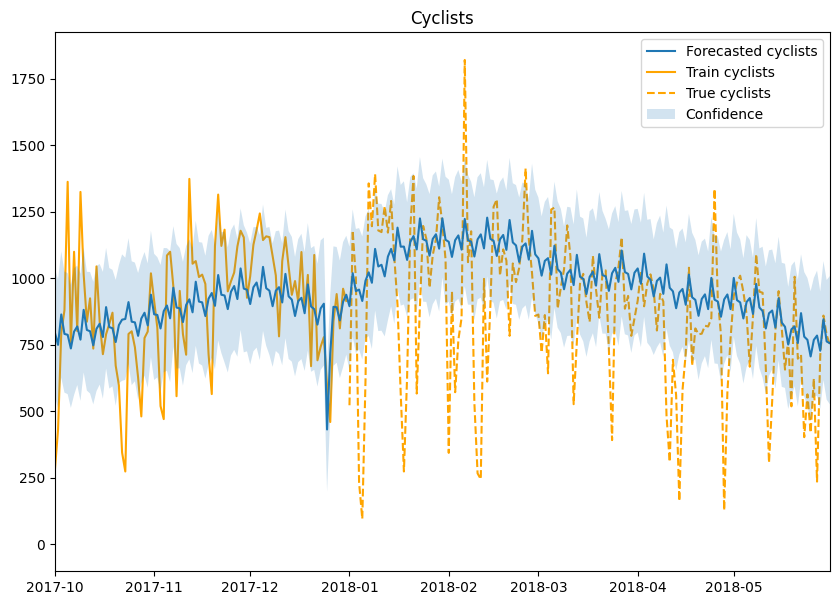

In [35]:
train_data_plot = train_cycle
test_data_plot = test_cycle

plt.figure(figsize = (10,7))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted cyclists', zorder = 1)
plt.plot(train_data_plot['ds'], train_data_plot['y'], label='Train cyclists', zorder = 0, color = 'orange')                                                                                       
plt.plot(test_data_plot['ds'], test_data_plot['y'], label='True cyclists', zorder = 0, color = 'orange', linestyle='dashed')
plt.fill_between(forecast['ds'], forecast['yhat_upper'], forecast['yhat_lower'],
                 alpha=.2, label='Confidence')
plt.title('Cyclists')
plt.legend()
plt.xlim(pd.to_datetime(['2017-10-01','2018-05-31']))
#plt.savefig('prophet_forecast.png')
plt.show()